In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carregar o dataset

df_salario = pd.read_csv('./dataset/dataset_salario.csv')

In [3]:
# Inspecionar a estrutura do dataframe

df_salario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempo_na_empresa  1000 non-null   int64  
 1   nivel_na_empresa  1000 non-null   int64  
 2   salario_em_reais  1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


In [4]:
# Copiar o DF para um DF EDA

df_salario_eda = df_salario.copy()

In [5]:
# Copiar o DF para um DF EDA

df_salario_bucketing = df_salario.copy()

### EDA 

In [6]:
# Visualizar os dados 

df_salario_eda.head(10)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
0,50,1,2288.13
1,49,4,2389.84
2,39,10,2158.73
3,51,1,2341.06
4,62,7,3584.20
5,105,10,12102.18
6,80,3,5723.35
7,85,2,6424.92
8,66,5,3916.18
9,73,5,4751.79


In [7]:
# Detectar valores ausentes

df_salario_eda.isna().sum()

tempo_na_empresa    0
nivel_na_empresa    0
salario_em_reais    0
dtype: int64

In [8]:
# Medidas estatísticas no DF

df_salario_eda.describe()

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
count,1000.000000,1000.000000,1000.000000
mean,59.712000,5.467000,5093.726110
std,34.027679,2.889509,4536.168857
min,1.000000,1.000000,538.560000
25%,30.750000,3.000000,1537.477500
50%,60.000000,6.000000,3237.920000
75%,89.000000,8.000000,7436.680000
max,120.000000,10.000000,18923.230000


<Axes: xlabel='tempo_na_empresa'>

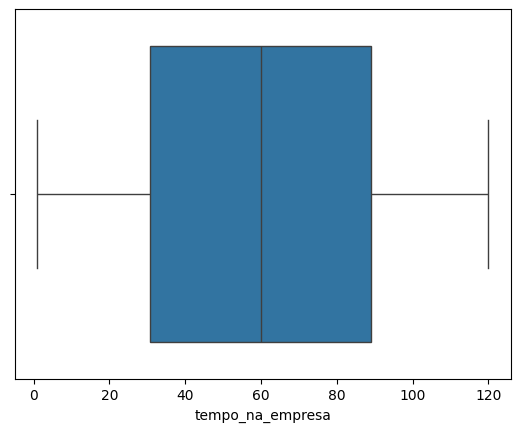

In [9]:
# Verificar / detectar outliers

sns.boxplot(data=df_salario_eda, x='tempo_na_empresa')

<Axes: xlabel='nivel_na_empresa'>

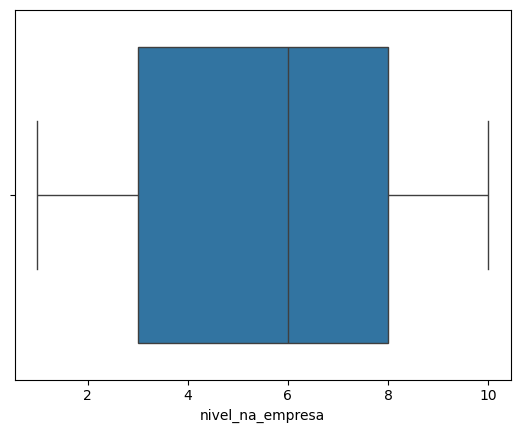

In [10]:
sns.boxplot(data=df_salario_eda, x='nivel_na_empresa')

<Axes: xlabel='salario_em_reais'>

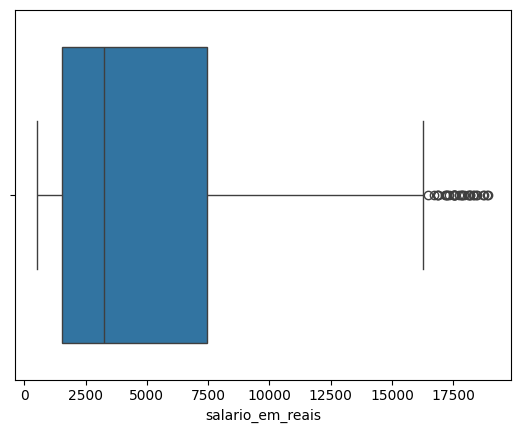

In [11]:
sns.boxplot(data=df_salario_eda, x='salario_em_reais')

<Axes: xlabel='tempo_na_empresa', ylabel='salario_em_reais'>

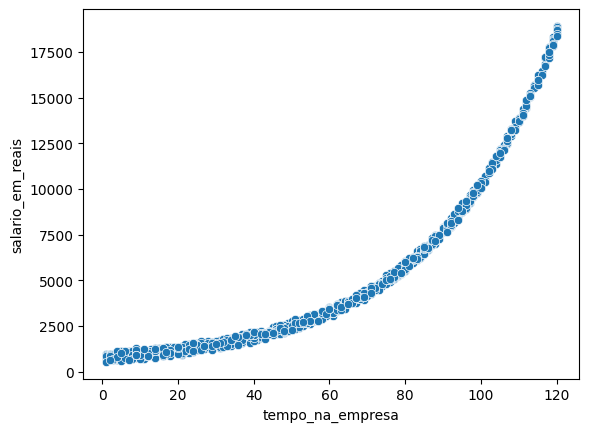

In [12]:
# Cruzamento variáveis numéricas com salario em reais (variável dependente)

sns.scatterplot(data=df_salario_eda, x='tempo_na_empresa', y='salario_em_reais')

<Axes: xlabel='nivel_na_empresa', ylabel='salario_em_reais'>

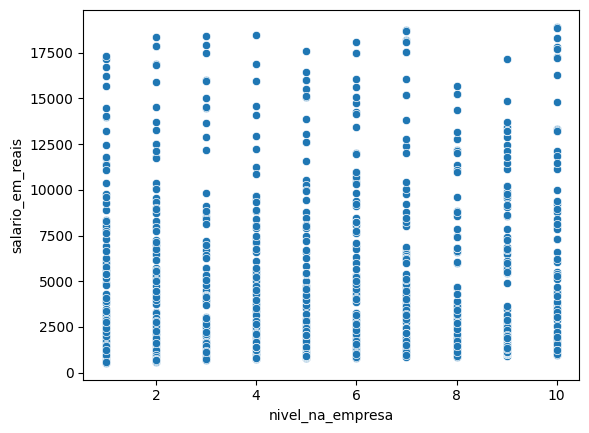

In [13]:
sns.scatterplot(data=df_salario_eda, x='nivel_na_empresa', y='salario_em_reais')

<Axes: xlabel='nivel_na_empresa', ylabel='tempo_na_empresa'>

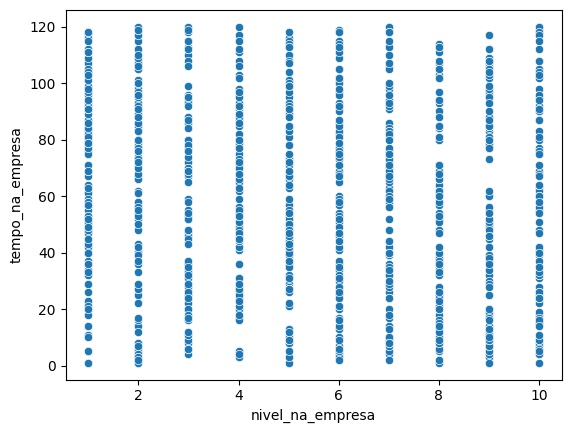

In [14]:
sns.scatterplot(data=df_salario_eda, x='nivel_na_empresa', y='tempo_na_empresa')

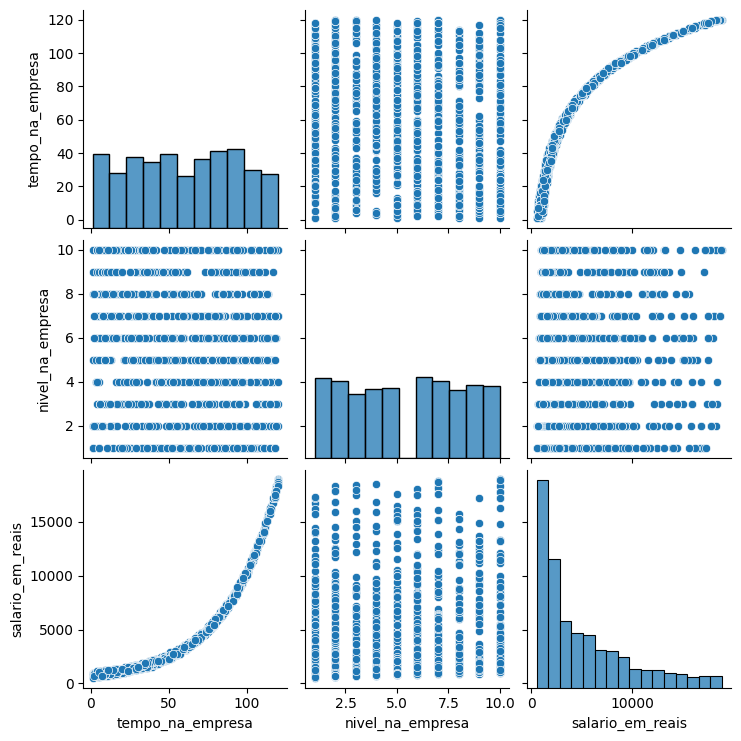

In [15]:
# Histogramas das variáveis

sns.pairplot(data=df_salario_eda)

<Axes: >

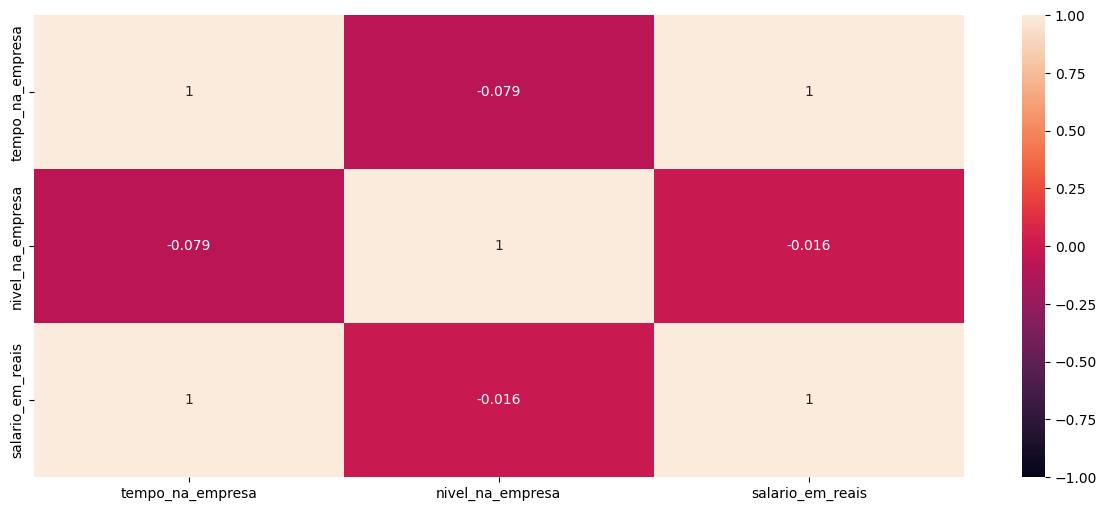

In [16]:
# Mapa de Calor 

plt.figure(figsize=(15,6))
sns.heatmap(df_salario_eda.corr('spearman'), vmin=-1, vmax=1, annot=True)

<Axes: >

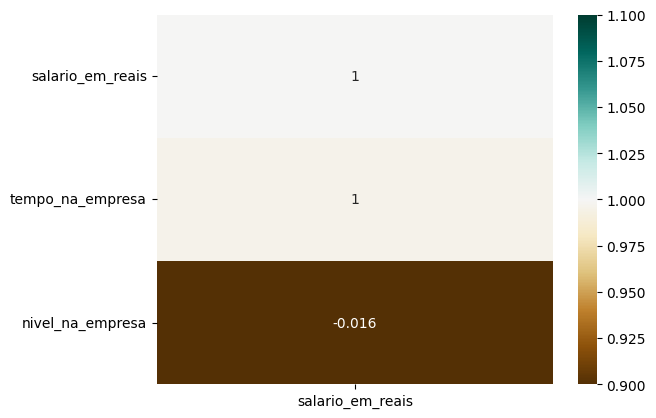

In [17]:
# Formato de Ranking

sns.heatmap(df_salario_eda.corr('spearman')[['salario_em_reais']].sort_values(by='salario_em_reais', ascending=False), vmin=1, vmax=1, annot=True, cmap='BrBG')

In [18]:
# Bucketing tempo de casa

bins_tempo_casa = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]

labels_tempo_casa = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119', '120-129']

df_salario_bucketing['escala_tempo'] = pd.cut(x=df_salario_bucketing['tempo_na_empresa'], bins=bins_tempo_casa, labels=labels_tempo_casa, include_lowest=True)

In [19]:
df_salario_bucketing.head(20)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais,escala_tempo
0,50,1,2288.13,40-49
1,49,4,2389.84,40-49
2,39,10,2158.73,30-39
3,51,1,2341.06,50-59
4,62,7,3584.20,60-69
5,105,10,12102.18,100-109
6,80,3,5723.35,70-79
7,85,2,6424.92,80-89
8,66,5,3916.18,60-69
9,73,5,4751.79,70-79


<Axes: xlabel='escala_tempo', ylabel='salario_em_reais'>

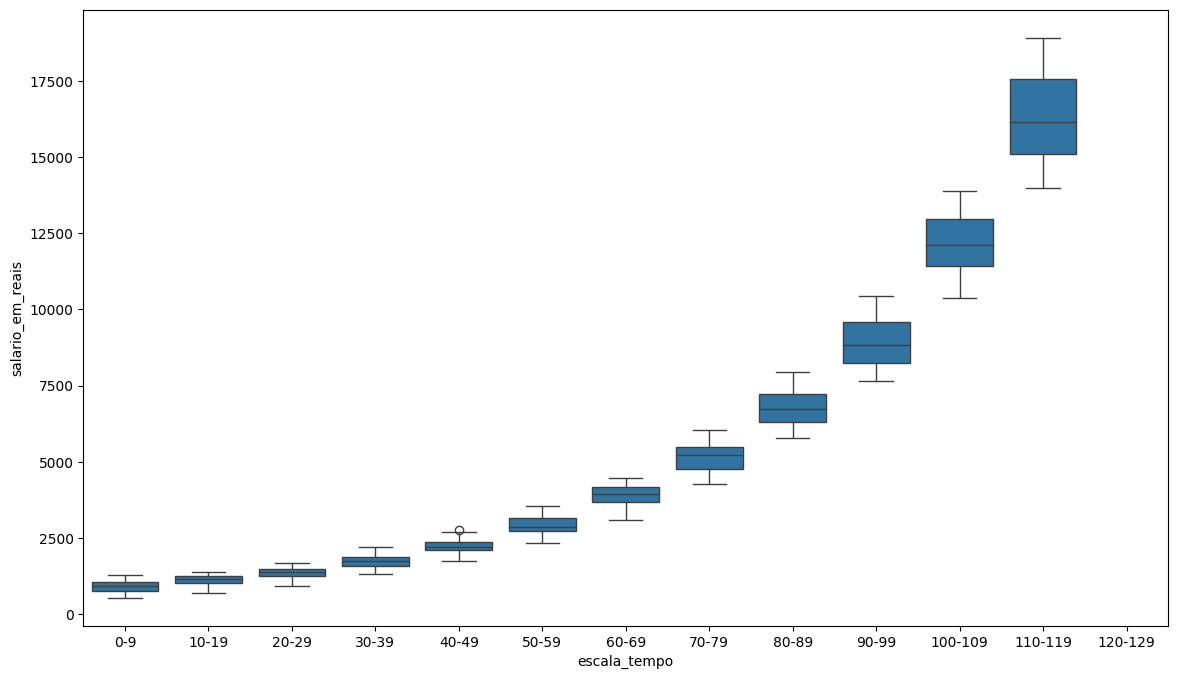

In [20]:
plt.figure(figsize=(14,8))
sns.boxplot(df_salario_bucketing, x='escala_tempo', y='salario_em_reais')

### Treinamento do Modelo Linear

In [21]:
# Importar Bibliotecas

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

import numpy as np

In [22]:
# Criar o Dataset de Treino e Teste

X = df_salario.drop(columns='salario_em_reais', axis=1)
y = df_salario['salario_em_reais']

In [23]:
# Split usando KFold com 5 pastas/splits

kf = KFold(n_splits=5, shuffle=True, random_state=51)

In [24]:
kf.split(X)

<generator object _BaseKFold.split at 0x7b5ae5ad57e0>

In [25]:
# Bloco para Treinamento do Modelo

# Pipeline
# Padronizar variáveis numéricas - tempo_na_empresa, nivel_na_empresa

# Nomes das Colunas

colunas_numericas = ['tempo_na_empresa', 'nivel_na_empresa']

# Transformer para colunas numéricas
transformer_numericas = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Criar um ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numericas, colunas_numericas)
    ]
)

# Criando o Pipeline principais = Pré-Processamento + Treinamento

model_regr = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]
)

# Armazenar RMSE Treino e Teste

rmse_scores_fold_train = []
rmse_scores_fold_test = []

# Armazenar R2 Score de Teste
r2score_fold_test = []

# Armazenar resíduos 

residuos = []

# Armazenar predições

y_pred_total = []


for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treine o modelo no conjunto de treinamento
    model_regr.fit(X_train, y_train)

    # Faça predições nos conjuntos de treinamentos e test
    y_train_pred = model_regr.predict(X_train)
    y_test_pred = model_regr.predict(X_test)

    # Calcule o RMSE, R2Score e Residuos para os conjuntos de treinamento
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test= np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Calcule o R2Score e Residuos para conjunto de teste
    r2score_test = r2_score(y_test, y_test_pred)
    residuos_test = np.array(y_test - y_test_pred)

    # Armazena as métricas da iteração na lista
    rmse_scores_fold_train.append(rmse_train)
    rmse_scores_fold_test.append(rmse_test)
    r2score_fold_test.append(r2score_test)
    residuos.append(residuos_test)
    y_pred_total.append(y_test_pred)

rmse_train_final = np.mean(rmse_scores_fold_train)
rmse_test_final = np.mean(rmse_scores_fold_test)

r2score_test_final = np.mean(r2score_fold_test)
percentual_rmse_final = ((rmse_test_final - rmse_train_final) / rmse_train_final) * 100
residuos = np.array(residuos).reshape(-1)

y_pred_total = np.array(y_pred_total).reshape(-1)


### Análise de Métricas - Modelo Linear

In [26]:
# Métricas 

print(f'RMSE Treino: {rmse_train_final}')
print(f'RMSE Teste: {rmse_test_final}')
print(f'% Dif. RMSE Treino e Teste: {percentual_rmse_final}')
print(f'R2Score Teste: {r2score_test_final}')

RMSE Treino: 1882.8318426651392
RMSE Teste: 1886.4504221336076
% Dif. RMSE Treino e Teste: 0.19218813844503052
R2Score Teste: 0.8261178870584761


### Análise de Resíduos - Modelo Linear

In [27]:
# Transformar residuos na escala padrão
# (X - media) / desvio_padrao

from scipy.stats import zscore
residuos_std = zscore(residuos)

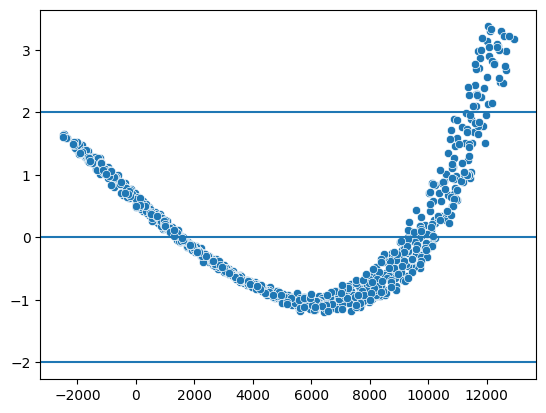

In [28]:
# Verificar linearidade dos residuos: Valores entre -2 e +2 (Escala Padrão)
# Verificar homocedasticidade: Valores em torno da reta sem nenhuma tendência ou formato

sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)

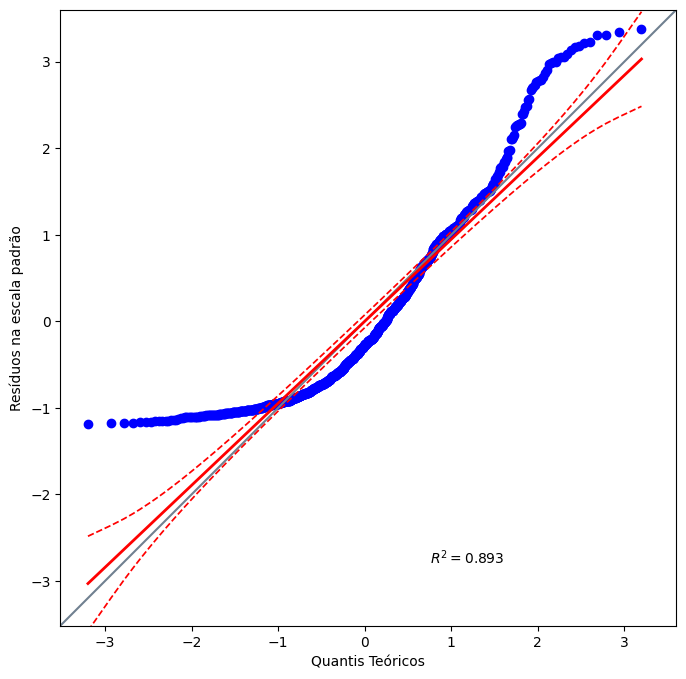

In [29]:
# Checar se residuos seguem uma distribuição normal
# QQ Plot

import pingouin as pg

plt.figure(figsize=(14,8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')
plt.show()

In [30]:
# Testes de normalidade - Shapiro-Wilk
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors
stat_shapiro, p_value_shapiro = shapiro(residuos)

print(f"Estat. Teste {stat_shapiro} e P-Value {p_value_shapiro}")

Estat. Teste 0.891969217965228 e P-Value 7.013497918013492e-26


In [31]:
# Testes de normalidade - Kolmogorov-Sminorv

stat_ks, p_value_ks = kstest(residuos, 'norm')

print(f"Estat. Teste {stat_ks} e P-Value {p_value_ks}")

Estat. Teste 0.5939999999999955 e P-Value 0.0


In [32]:
# Testes de normalidade - Lilliefors

stat_ll, p_value_ll = lilliefors(residuos, dist='norm', pvalmethod='table')

print(f"Estat. Teste {stat_ll} e P-Value {p_value_ll}")

Estat. Teste 0.11825983774680088 e P-Value 0.0009999999999998899


### Treinar Modelo Polinominal

In [33]:
# Exemplo de criação de Features Polinominais

feat_poly = PolynomialFeatures(degree=3, include_bias=False)

X_poly = feat_poly.fit_transform(X)
feat_poly.feature_names_in_

array(['tempo_na_empresa', 'nivel_na_empresa'], dtype=object)

In [34]:
feat_poly.get_feature_names_out(feat_poly.feature_names_in_)

array(['tempo_na_empresa', 'nivel_na_empresa', 'tempo_na_empresa^2',
       'tempo_na_empresa nivel_na_empresa', 'nivel_na_empresa^2',
       'tempo_na_empresa^3', 'tempo_na_empresa^2 nivel_na_empresa',
       'tempo_na_empresa nivel_na_empresa^2', 'nivel_na_empresa^3'],
      dtype=object)

In [35]:
# Importar Bibliotecas

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

import numpy as np

In [47]:
# Bloco para Treinamento do Modelo

# graus_polynominal = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

graus_polynominal = [4]

rmse_train_values = []
rmse_test_values = []
percentual_rmse_values = []
r2score_test_values = []

# Split usando KFold com 5 pastas/splits

kf = KFold(n_splits=5, shuffle=True, random_state=51)

for grau in graus_polynominal:


    # Pipeline
    # Padronizar variáveis numéricas - tempo_na_empresa, nivel_na_empresa

    # Nomes das Colunas

    colunas_numericas = ['tempo_na_empresa', 'nivel_na_empresa']

    # Transformer para colunas numéricas
    transformer_numericas = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    # Criar um ColumnTransformer

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', transformer_numericas, colunas_numericas)
        ]
    )

    # Criar Features Polinominais

    poly_feat = PolynomialFeatures(degree=grau, include_bias=False)

    # Criando o Pipeline principais = Pré-Processamento + Treinamento

    model_poly = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('poly_features', poly_feat),
            ('regressor', LinearRegression())
        ]
    )

    # Armazenar RMSE Treino e Teste

    rmse_scores_fold_train = []
    rmse_scores_fold_test = []

    # Armazenar R2 Score de Teste
    r2score_fold_test = []

    # Armazenar resíduos 

    residuos = []

    # Armazenar predições

    y_pred_total = []


    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Treine o modelo no conjunto de treinamento
        model_poly.fit(X_train, y_train)

        # Faça predições nos conjuntos de treinamentos e test
        y_train_pred = model_poly.predict(X_train)
        y_test_pred = model_poly.predict(X_test)

        # Calcule o RMSE, R2Score e Residuos para os conjuntos de treinamento
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test= np.sqrt(mean_squared_error(y_test, y_test_pred))

        # Calcule o R2Score e Residuos para conjunto de teste
        r2score_test = r2_score(y_test, y_test_pred)
        residuos_test = np.array(y_test - y_test_pred)

        # Armazena as métricas da iteração na lista
        rmse_scores_fold_train.append(rmse_train)
        rmse_scores_fold_test.append(rmse_test)
        r2score_fold_test.append(r2score_test)
        residuos.append(residuos_test)
        y_pred_total.append(y_test_pred)

    rmse_train_final = np.mean(rmse_scores_fold_train)
    rmse_test_final = np.mean(rmse_scores_fold_test)

    r2score_test_final = np.mean(r2score_fold_test)
    percentual_rmse_final = ((rmse_test_final - rmse_train_final) / rmse_train_final) * 100
    residuos = np.array(residuos).reshape(-1)

    y_pred_total = np.array(y_pred_total).reshape(-1)

    rmse_train_values.append(rmse_train_final)
    rmse_test_values.append(rmse_test_final)
    r2score_test_values.append(r2score_test_final)
    percentual_rmse_values.append(percentual_rmse_final)


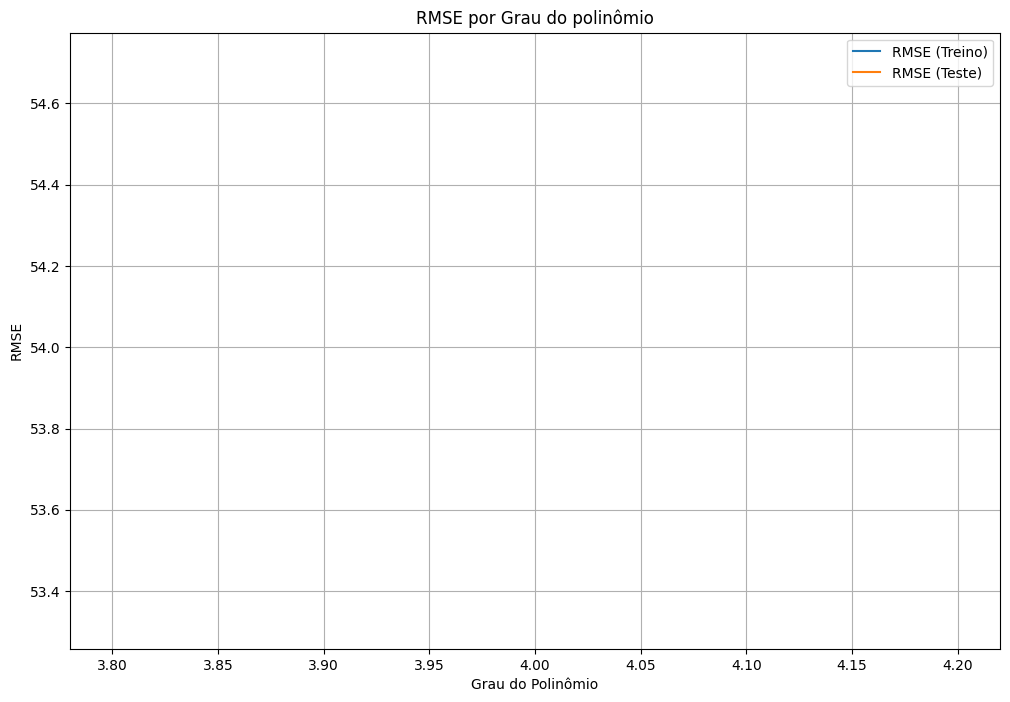

In [48]:
# Plotar gráfico para comparar RMSE dos polinomios

plt.figure(figsize=(12,8))
plt.plot(graus_polynominal, rmse_train_values, label='RMSE (Treino)')
plt.plot(graus_polynominal, rmse_test_values, label='RMSE (Teste)')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.title('RMSE por Grau do polinômio')
plt.legend()
plt.grid(True)
plt.show()

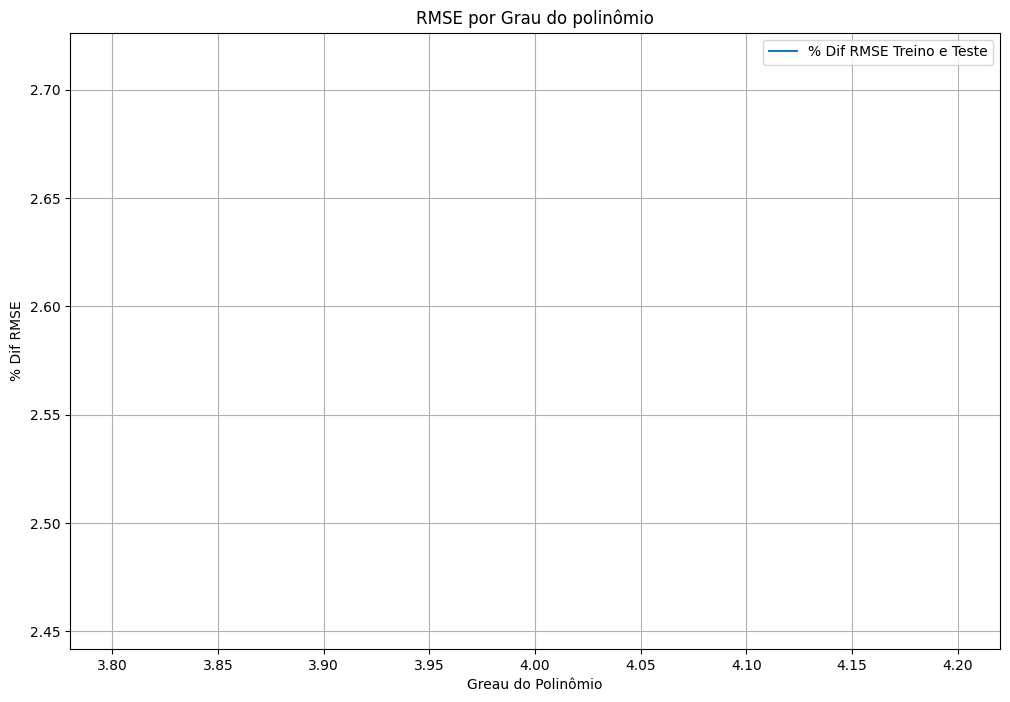

In [49]:
# Plotar gráfico para comparar %Dif RMSE (Treino e teste)

plt.figure(figsize=(12,8))
plt.plot(graus_polynominal, percentual_rmse_values, label='% Dif RMSE Treino e Teste')
plt.xlabel('Greau do Polinômio')
plt.ylabel('% Dif RMSE')
plt.title('RMSE por Grau do polinômio')
plt.legend()
plt.grid(True)
plt.show()

### Análise de Métricas - Polinominal

In [50]:
# Métricas 

print(f'RMSE Treino: {rmse_train_final}')
print(f'RMSE Teste: {rmse_test_final}')
print(f'% Dif. RMSE Treino e Teste: {percentual_rmse_final}')
print(f'R2Score Teste: {r2score_test_final}')

RMSE Treino: 53.32698559565159
RMSE Teste: 54.70504352796338
% Dif. RMSE Treino e Teste: 2.584166190755325
R2Score Teste: 0.9998524123039415


### Análise de Resíduos - Modelo Polinominal

In [51]:
# Transformar residuos na escala padrão
# (X - media) / desvio_padrao

from scipy.stats import zscore
residuos_std = zscore(residuos)

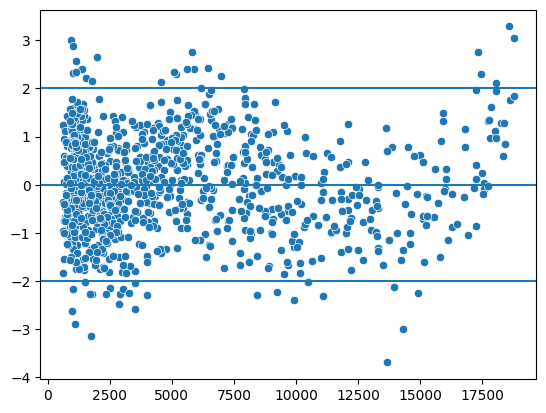

In [52]:
# Verificar linearidade dos residuos: Valores entre -2 e +2 (Escala Padrão)
# Verificar homocedasticidade: Valores em torno da reta sem nenhuma tendência ou formato

sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)

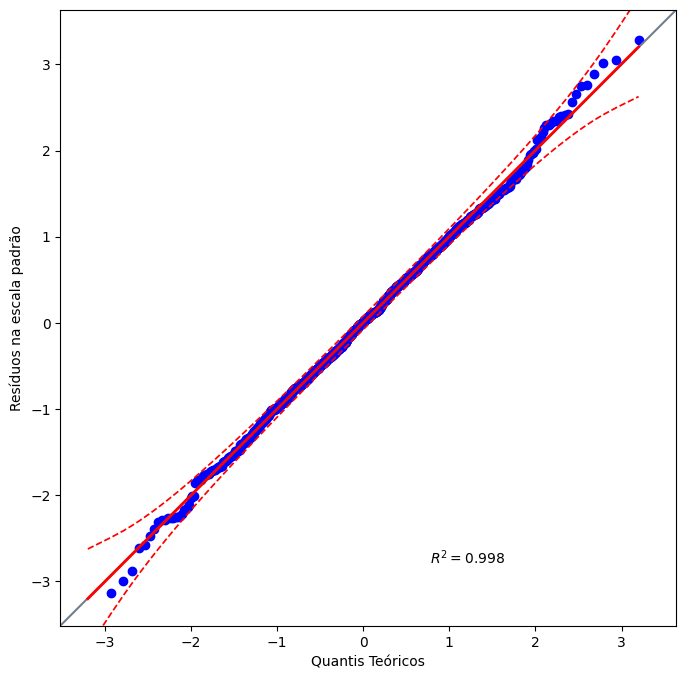

In [53]:
# Checar se residuos seguem uma distribuição normal
# QQ Plot

import pingouin as pg

plt.figure(figsize=(14,8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')
plt.show()

In [54]:
# Testes de normalidade - Shapiro-Wilk
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors
stat_shapiro, p_value_shapiro = shapiro(residuos)

print(f"Estat. Teste {stat_shapiro} e P-Value {p_value_shapiro}")

Estat. Teste 0.9986951372205289 e P-Value 0.6852797159638004


In [55]:
# Testes de normalidade - Kolmogorov-Sminorv

stat_ks, p_value_ks = kstest(residuos, 'norm')

print(f"Estat. Teste {stat_ks} e P-Value {p_value_ks}")

Estat. Teste 0.4823744649953392 e P-Value 1.2202460105710526e-214


In [56]:
# Testes de normalidade - Lilliefors

stat_ll, p_value_ll = lilliefors(residuos, dist='norm', pvalmethod='table')

print(f"Estat. Teste {stat_ll} e P-Value {p_value_ll}")

Estat. Teste 0.013637346894973312 e P-Value 0.956627002204744


### Realizar Predições Individuais

In [65]:
input_features = {
    'tempo_na_empresa': 84,
    'nivel_na_empresa': 10
}

pred_df = pd.DataFrame(input_features, index=[1])

In [66]:
# Predição

model_poly.predict(pred_df)

array([6683.25478935])

In [59]:
import joblib

In [60]:
# Salvar o modelo

joblib.dump(model_poly, './modelo_salario.pkl')

['./modelo_salario.pkl']